In [1]:
# Setup:
import os
import sys

sys.path.append(os.path.dirname(os.path.dirname(os.getcwd())))
data_dir = os.path.join(os.getcwd(), "data")

from kaggle_rock import *

### Load in data:

In [2]:
import pandas as pd

train = pd.read_csv(os.path.join(data_dir, "train.csv"), encoding="utf-8")
test = pd.read_csv(os.path.join(data_dir, "test.csv"), encoding="utf-8")
print("Train ", train.shape)
print("Test ", test.shape)

train.head().append(train.tail())

Train  (250000, 102)
Test  (150000, 101)


,id,f0,f1,f2,f3,f4,f5,f6,f7,f8,...,f91,f92,f93,f94,f95,f96,f97,f98,f99,loss
0,0,-0.002350,59,0.766739,-1.350460,42.27270,16.68570,30.35990,1.267300,0.392007,...,-42.43990,26.854000,1.45751,0.696161,0.941764,1.828470,0.924090,2.296580,10.489800,15
1,1,0.784462,145,-0.463845,-0.530421,27324.90000,3.47545,160.49800,0.828007,3.735860,...,-184.13200,7.901370,1.70644,-0.494699,-2.058300,0.819184,0.439152,2.364700,1.143830,3
2,2,0.317816,19,-0.432571,-0.382644,1383.26000,19.71290,31.10260,-0.515354,34.430800,...,7.43721,37.218100,3.25339,0.337934,0.615037,2.216760,0.745268,1.696790,12.305500,6
3,3,0.210753,17,-0.616454,0.946362,-119.25300,4.08235,185.25700,1.383310,-47.521400,...,9.66778,0.626942,1.49425,0.517513,-10.222100,2.627310,0.617270,1.456450,10.028800,2
4,4,0.439671,20,0.968126,-0.092546,74.30200,12.30650,72.18600,-0.233964,24.399100,...,290.65700,15.604300,1.73557,-0.476668,1.390190,2.195740,0.826987,1.784850,7.071970,1
249995,249995,0.923980,6,0.663212,-0.055120,6.61768,1.26619,40.44790,0.852375,25.522400,...,3517.97000,18.534200,1.41936,0.607504,4.950780,2.853420,0.961882,1.068010,1.437650,11
249996,249996,0.243556,7,-0.557062,1.333470,-54.88610,17.58310,212.96400,-1.204750,-128.385000,...,1945.81000,19.482200,1.60072,-0.154877,5.693280,1.994540,0.760925,1.427880,1.226720,5
249997,249997,0.046023,53,0.462863,0.704034,2062.94000,14.58160,11.42710,-0.509812,80.818000,...,-28.46890,11.008200,1.61080,-0.350927,27.986900,1.012690,0.830533,1.005470,0.455332,1
249998,249998,0.977330,12,-1.002880,0.576377,4741.16000,11.10090,3.81546,0.616191,118.902000,...,-275.53700,21.985700,3.16051,0.772058,2.592220,3.938260,0.697430,0.962347,7.415890,10
249999,249999,0.244233,51,0.729304,-0.702592,197.46200,19.02400,42.33370,0.465181,-115.398000,...,5387.25000,38.574600,3.61783,-0.544969,-0.987695,1.871910,0.452516,0.935411,28.912200,7


In [3]:
# Check if there are any NaNs:
train.isna().astype(int).sum().max()

0

In [4]:
y = train["loss"]
X = train[[c for c in train.columns if c not in ("id", "loss")]]

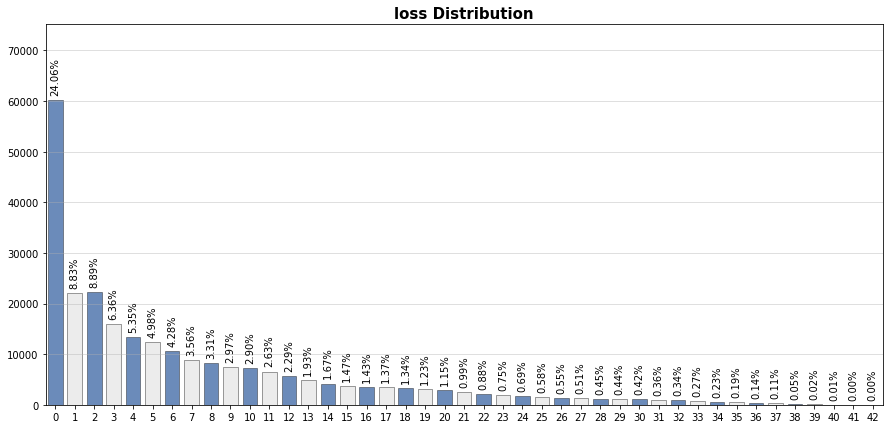

In [6]:
# Check distribution of y variable:
y_dist = plot_disrete_dist(y)

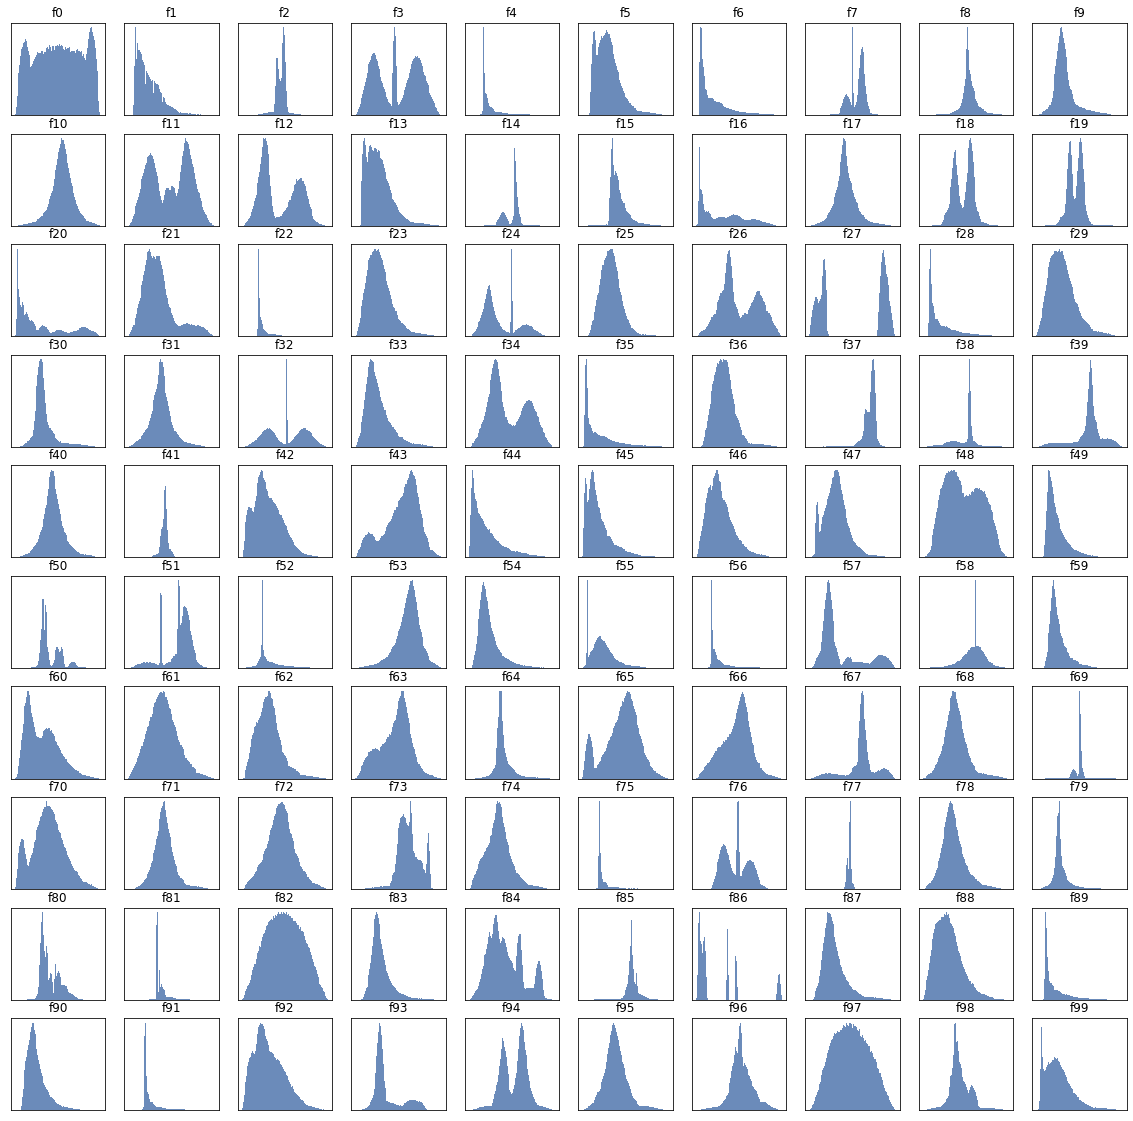

In [7]:
# Check distribution of all X features:
all_dists = plot_hist_all_features(X, bins=100)

In [8]:
turbo_describe(X, viz="bar")

,count,mean,std,min,25%,50%,75%,max
f0,250000.000000,0.511213,0.307884,-0.069273,0.251287,0.514962,0.777322,1.072070
f1,250000.000000,51.378476,42.396636,-17.000000,18.000000,41.000000,75.000000,273.000000
f2,250000.000000,0.107155,1.322200,-7.895580,-0.611172,0.253815,0.759249,9.768590
f3,250000.000000,0.050010,0.792368,-1.475560,-0.719418,0.004099,0.765456,1.680190
f4,250000.000000,3595.133426,6072.401061,-7589.280000,163.864750,943.000500,4115.355000,37847.500000
f5,250000.000000,8.205953,5.475723,-3.291050,4.110127,7.472445,11.030950,35.078000
f6,250000.000000,164.508753,183.335563,-40.967200,27.894900,91.005250,240.843750,947.143000
f7,250000.000000,0.375533,0.813597,-4.143080,-0.026245,0.619862,0.933855,4.010380
f8,250000.000000,16.669745,99.758709,-502.813000,-17.392025,8.714945,55.407625,465.956000
f9,250000.000000,1.190382,0.099700,0.934037,1.132640,1.170370,1.218880,1.712450


Scales of features are very different - feature `f60` is completely dominating all other features. Need to apply scaler.

In [10]:
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()
X_sc = pd.DataFrame(scaler.fit_transform(X), index=X.index, columns=X.columns)
turbo_describe(X_sc, viz="bar", viz_cols = ["50%", "min", "max"])

,count,mean,std,min,25%,50%,75%,max
f0,250000.000000,-0.000000,1.000002,-1.885412,-0.844236,0.012179,0.864321,1.821658
f1,250000.000000,0.000000,1.000002,-1.612831,-0.787292,-0.244795,0.557157,5.227348
f2,250000.000000,-0.000000,1.000002,-6.052605,-0.543283,0.110922,0.493190,7.307107
f3,250000.000000,-0.000000,1.000002,-1.925333,-0.971050,-0.057942,0.902923,2.057355
f4,250000.000000,0.000000,1.000002,-1.841847,-0.565061,-0.436753,0.085670,5.640674
f5,250000.000000,-0.000000,1.000002,-2.099636,-0.747999,-0.133957,0.515914,4.907498
f6,250000.000000,-0.000000,1.000002,-1.120767,-0.745159,-0.400924,0.416368,4.268871
f7,250000.000000,0.000000,1.000002,-5.553885,-0.493830,0.300308,0.686241,4.467637
f8,250000.000000,-0.000000,1.000002,-5.207403,-0.341442,-0.079741,0.388317,4.503739
f9,250000.000000,0.000000,1.000002,-2.571180,-0.579164,-0.200726,0.285836,5.236412


#### Observations

* Several features (e.g. `f27`, `f86`) are skewed/have "weird" distributions since the median is very different from the mean.
* Several features (e.g. `f2`, `f41`, `f77`, `f85`) have extreme outliers as min/max is very far from mean.

Look at these in more detail.

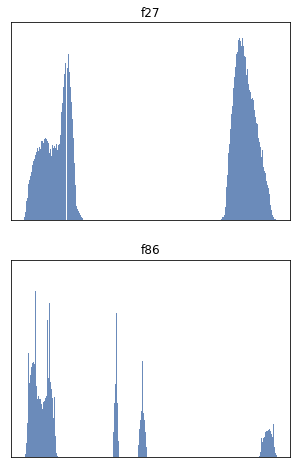

In [11]:
weird_dist_hist = plot_hist_all_features(X[["f27", "f86"]], figsize=(5, 8), bins=1000)

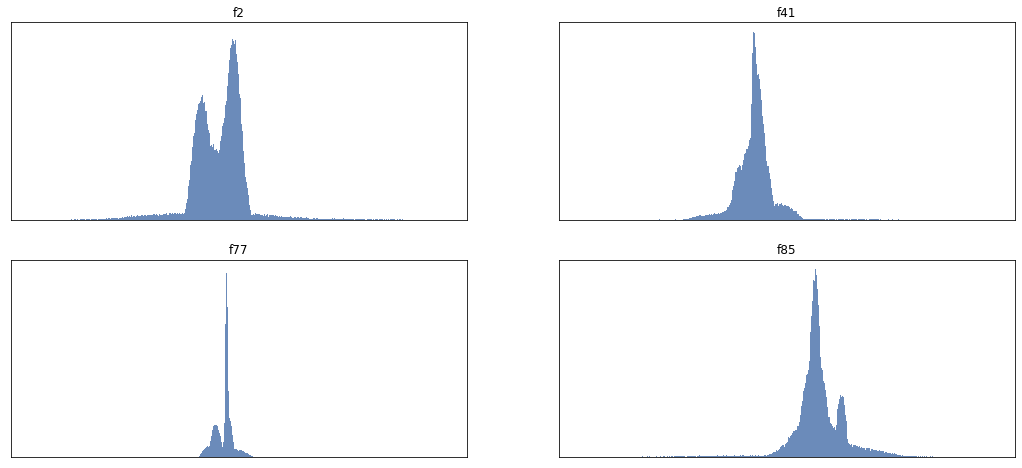

In [12]:
outliers_hist = plot_hist_all_features(X[["f2", "f41", "f77", "f85"]], figsize=(18, 8), bins=1000)

Now look at the skewed data:

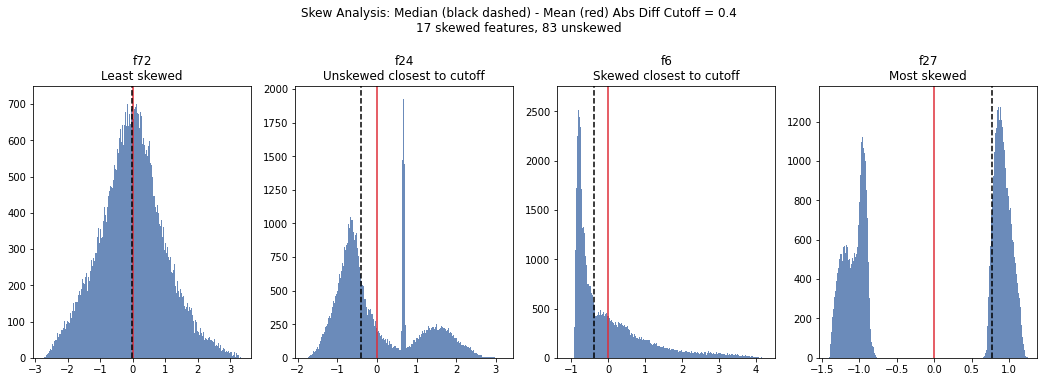

In [13]:
mean_mid_skew = plot_mean_med_diff_skew_analysis(X_sc, cutoff=0.4, bins=1000)

Inspect some of the discrete X features:

In [12]:
discrete_cols = discrete_columns(X)
print(discrete_cols)

{'f1': 289, 'f16': 247476, 'f27': 37471, 'f55': 4726, 'f60': 212504, 'f86': 329}


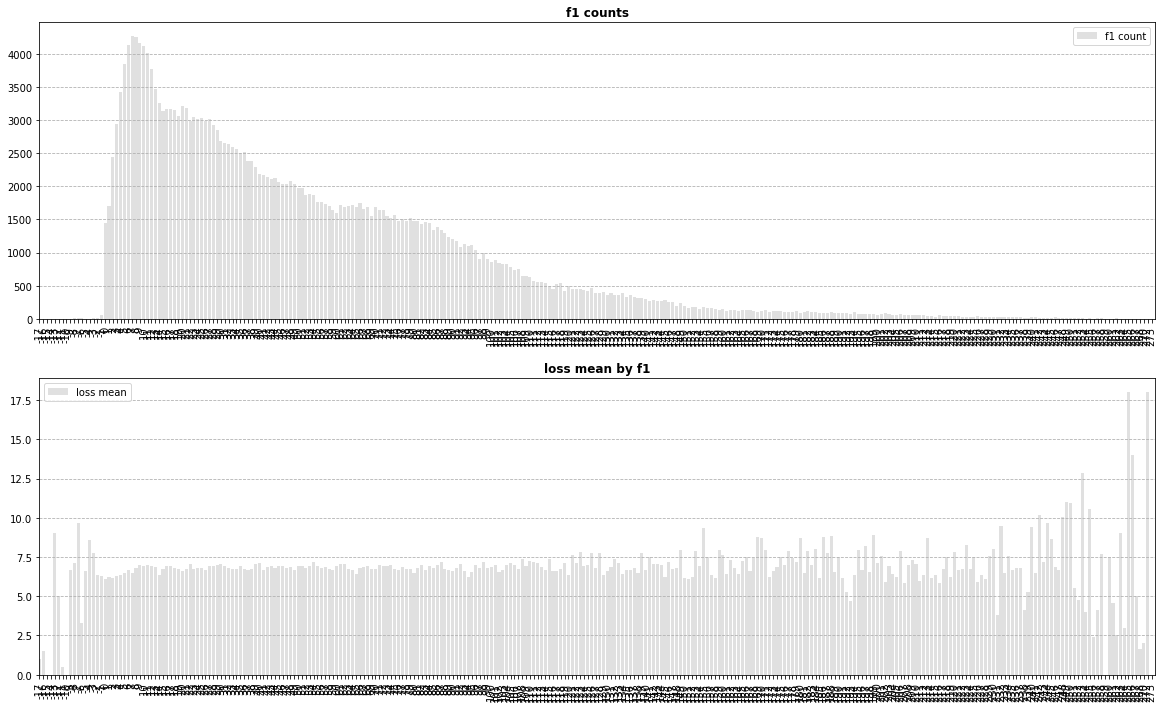

In [15]:
f1_vs_y = plot_discrete_x_vs_discrete_y(X["f1"], y, sort_by_y=False)

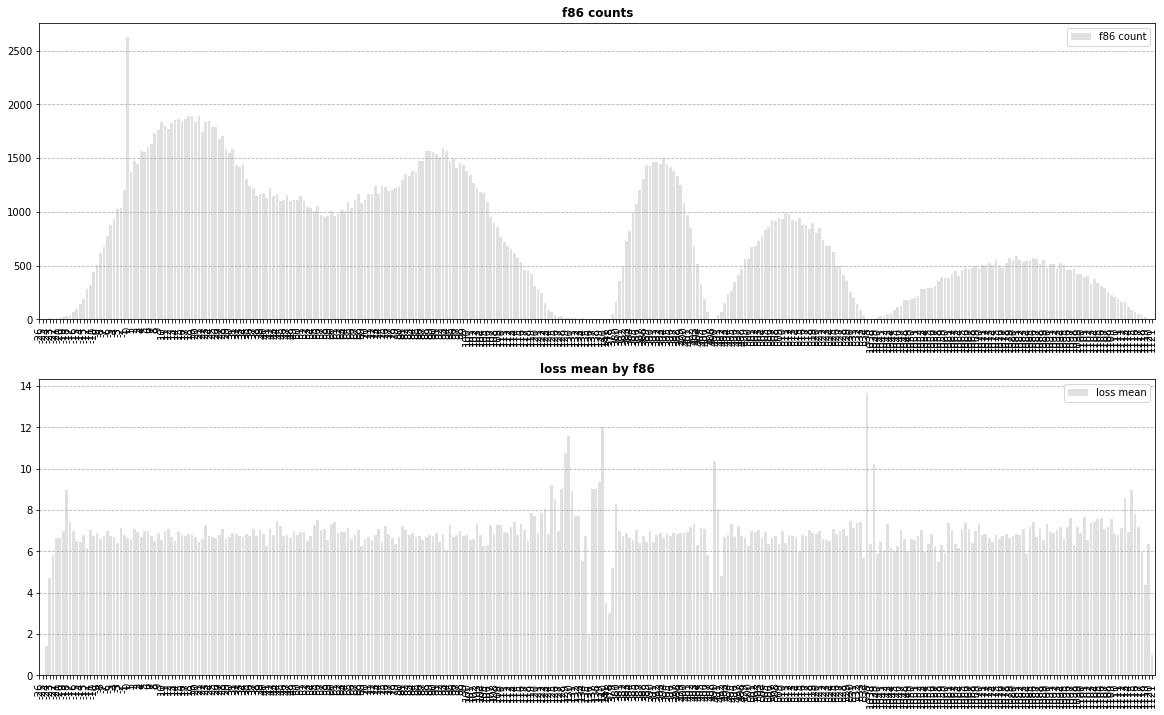

In [16]:
f86_vs_y = plot_discrete_x_vs_discrete_y(X["f86"], y, sort_by_y=False)

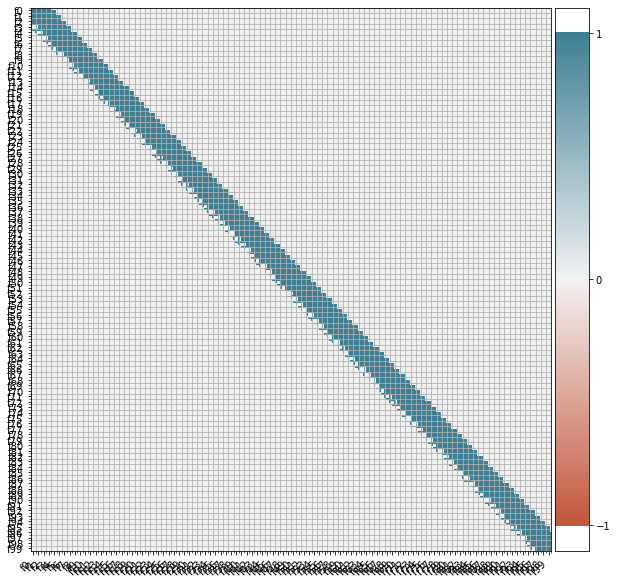

In [17]:
# Correlations of all features:
from heatmap import corrplot

plt.figure(figsize=(10, 10))
corrplot(X.corr())

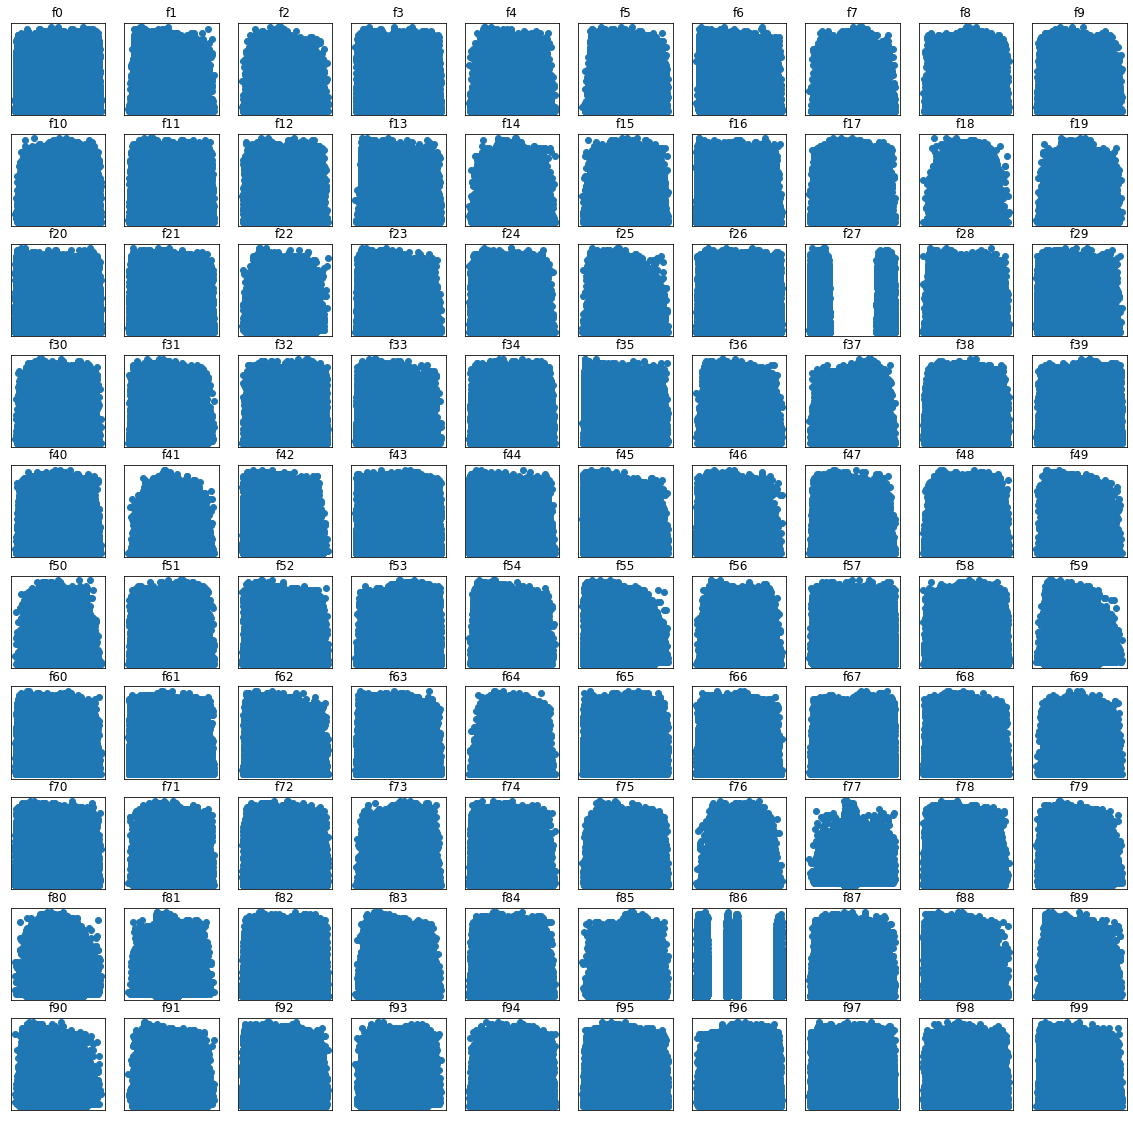

In [19]:
xy_scatters = plot_scatter_all_features(X, y)

2 interesting features stand out - f27 and f86. Closer look with more detailed histograms.

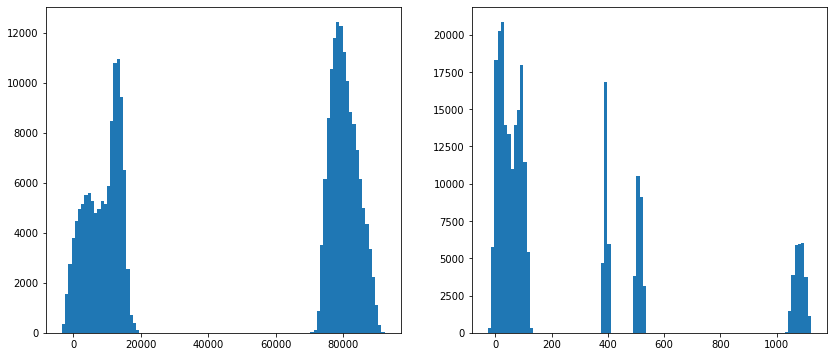

In [20]:
fig, ax = plt.subplots(1, 2, figsize=(14, 6))
_ =ax[0].hist(X["f27"], bins=100)
_ =ax[1].hist(X["f86"], bins=100)

Possibly split dataset using cutoff somewhere around 40k for f27:

In [21]:
f = X["f27"]
f[f <= 40000].max()

19757

In [22]:
f[f > 40000].min()

70578

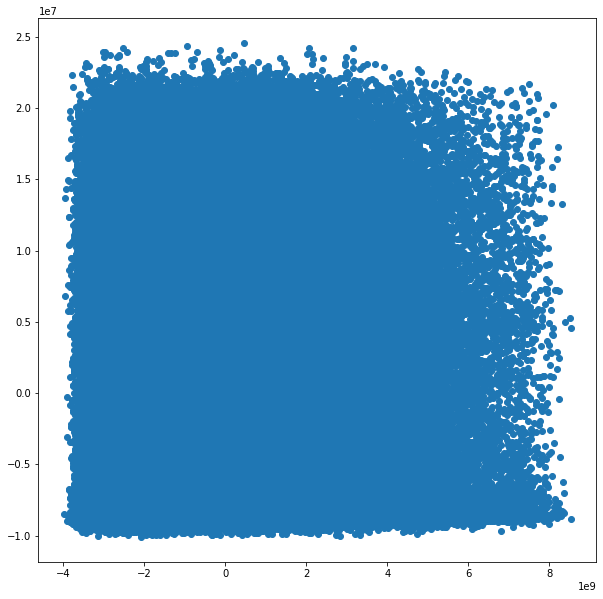

In [23]:
# PCA projection to 2 dimensions for visualizing:
from sklearn.decomposition import PCA


model = PCA(n_components=2)
two_dim = model.fit_transform(X)
fig, ax = plt.subplots(figsize=(10, 10))
ax.scatter(two_dim[:, 0], two_dim[:, 1])

In [24]:
from sklearn.preprocessing import PowerTransformer

pt = PowerTransformer(method="yeo-johnson", standardize=True)
X_transformed = pt.fit_transform(X)
X_transformed = pd.DataFrame(X_transformed, index=X.index, columns=X.columns)

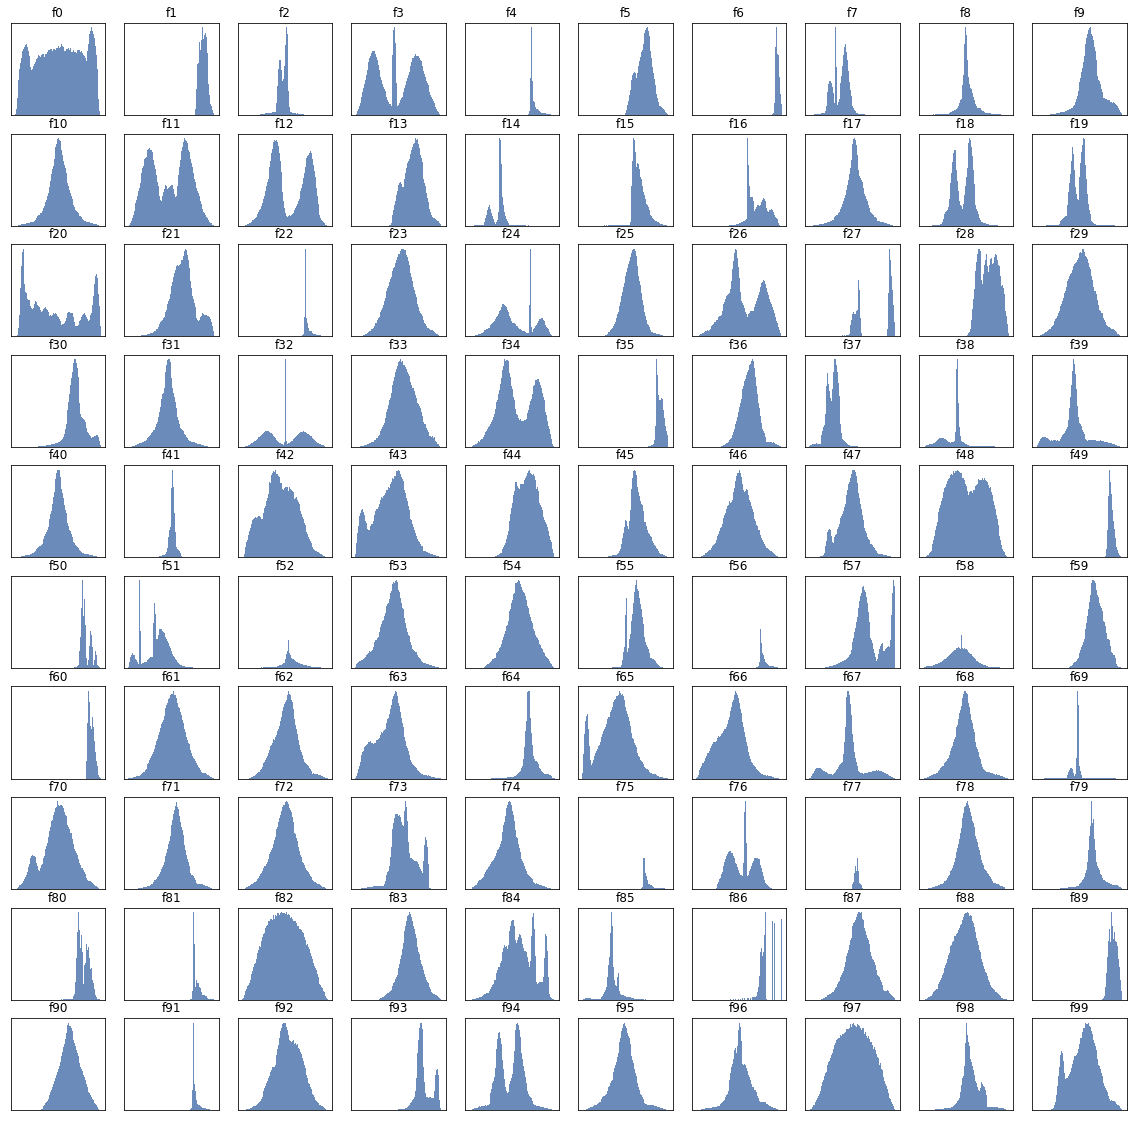

In [28]:
x_trans_hists = plot_hist_all_features(X_transformed, bins=100)

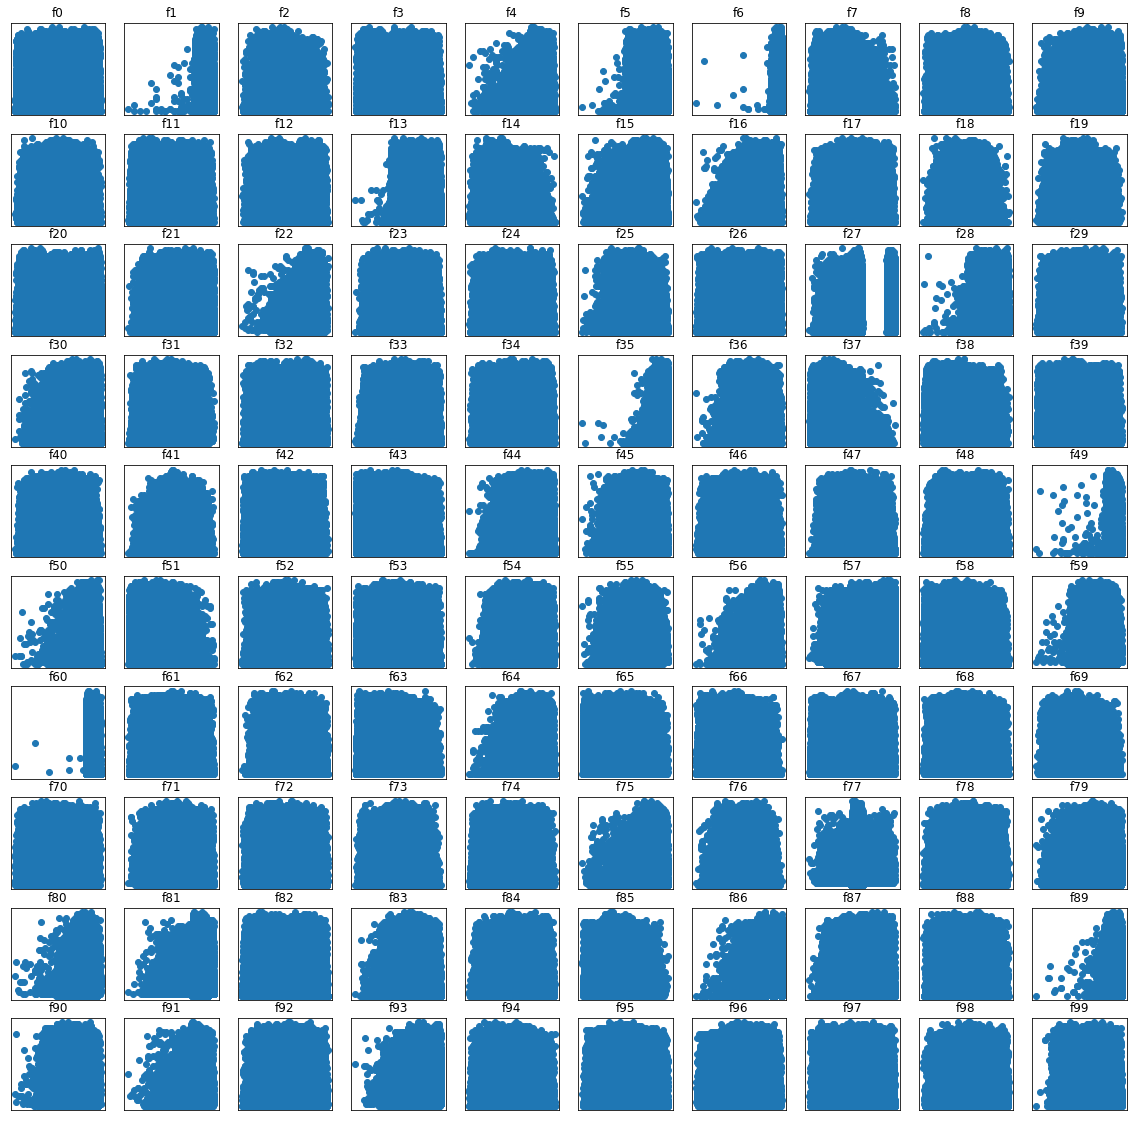

In [27]:
xy_scatters = plot_scatter_all_features(X_transformed, y)